# Relatório de análise de filmes - Alura

<p align="center"><img src="img/img - cinema.jpg" height=400 width=400></p>

In [103]:
# libs
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import zconfint, ztest

In [9]:
# importando os dados que serão utitilazados no projeto
tmdb = pd.read_csv('dados/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [10]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


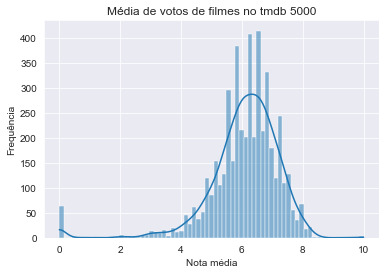

In [11]:
sns.set_style('darkgrid')
ax = sns.histplot(tmdb.vote_average, kde = True)
ax.set(xlabel = 'Nota média', ylabel = 'Frequência', title = 'Média de votos de filmes no tmdb 5000');

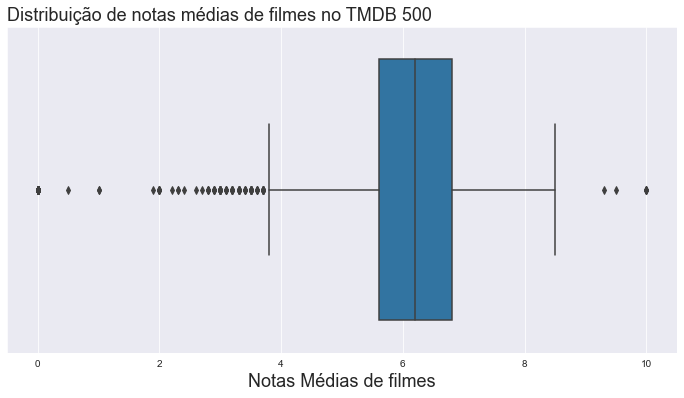

In [12]:
ax = sns.boxplot(data = tmdb, x = 'vote_average')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de notas médias de filmes no TMDB 500', fontsize = 18, loc = 'left')
ax.set_xlabel('Notas Médias de filmes', fontsize = 18);

In [13]:
tmdb.query('vote_average == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


In [14]:
tmdb.query('vote_average == 10').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


In [15]:
tmdb.query('vote_average == 0').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


### Tem algo de estranhos com os dados do tmdb, pois não faz muito sentido filmes com a nota média ser 0 ou 10, podemos perceber que nesses filmes houveram pouquissímos votos. Portanto, irei apenas analisar os dados com filmes que apresentem mais do que 10 votos.

In [16]:
# dados de filmes que apresentam mais do que 10 votos
tmdb_com_10 = tmdb.query('vote_count >= 10')
tmdb_com_10.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


<AxesSubplot:>

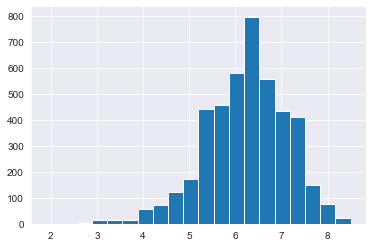

In [17]:
tmdb_com_10.vote_average.hist(bins = 20)

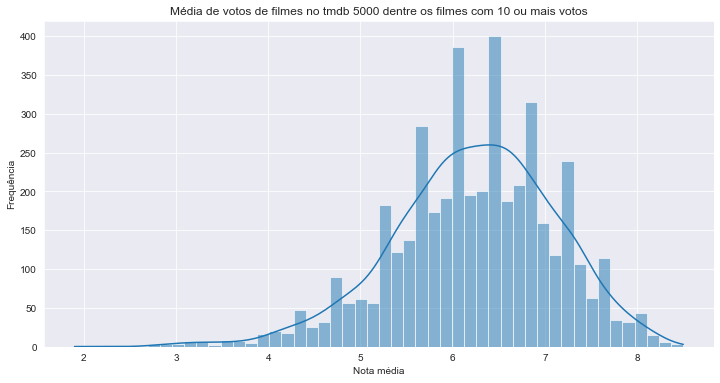

In [18]:
sns.set_style('darkgrid')
ax = sns.histplot(tmdb_com_10.vote_average, kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Nota média', ylabel = 'Frequência', title = 'Média de votos de filmes no tmdb 5000 dentre os filmes com 10 ou mais votos');

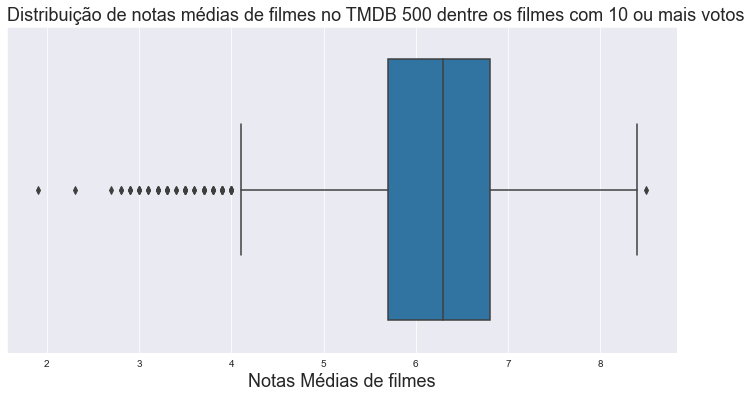

In [19]:
ax = sns.boxplot(data = tmdb_com_10, x = 'vote_average')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de notas médias de filmes no TMDB 500 dentre os filmes com 10 ou mais votos',
             fontsize = 18, loc = 'left')
ax.set_xlabel('Notas Médias de filmes', fontsize = 18);

## Vamos analisar agora as avaliações do movielens

In [20]:
notas = pd.read_csv('dados/ratings.csv')

In [21]:
nota_media_por_filme = notas.groupby('movieId').mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

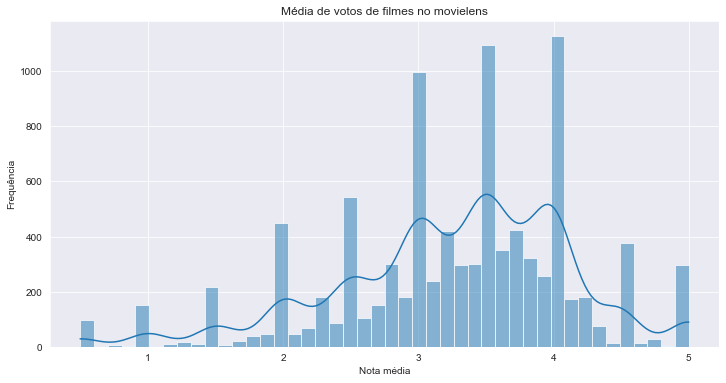

In [22]:
ax = sns.histplot(nota_media_por_filme, kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Nota média', ylabel = 'Frequência', title = 'Média de votos de filmes no movielens');

In [23]:
quantidade_de_votos_por_filme = notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query('rating >= 10').index
filmes_com_pelo_menos_10_votos

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2269)

In [24]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

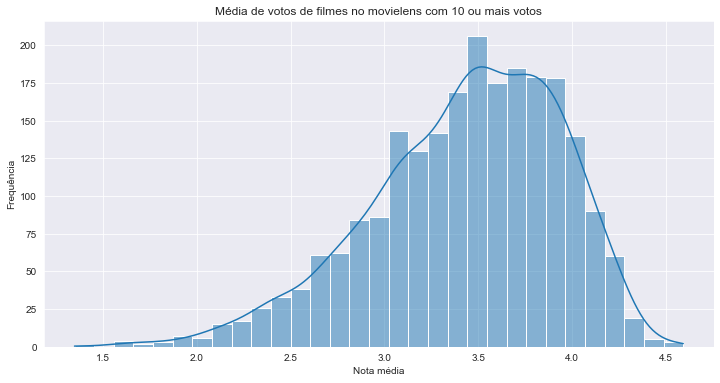

In [25]:
ax = sns.histplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Nota média', ylabel = 'Frequência', title = 'Média de votos de filmes no movielens com 10 ou mais votos');

C:\Users\Notebook Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


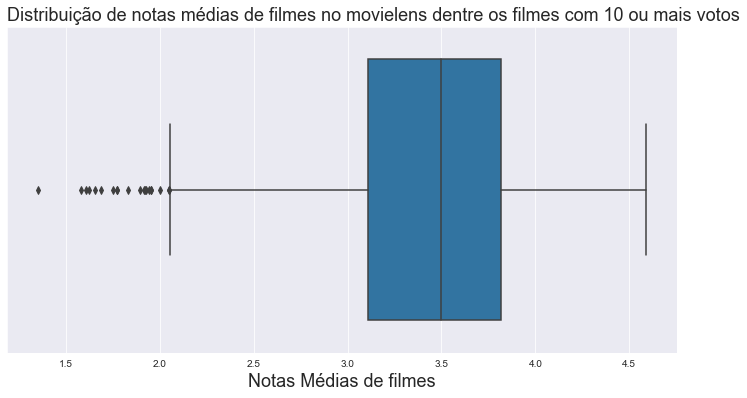

In [26]:
ax = sns.boxplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de notas médias de filmes no movielens dentre os filmes com 10 ou mais votos',
             fontsize = 18, loc = 'left')
ax.set_xlabel('Notas Médias de filmes', fontsize = 18);

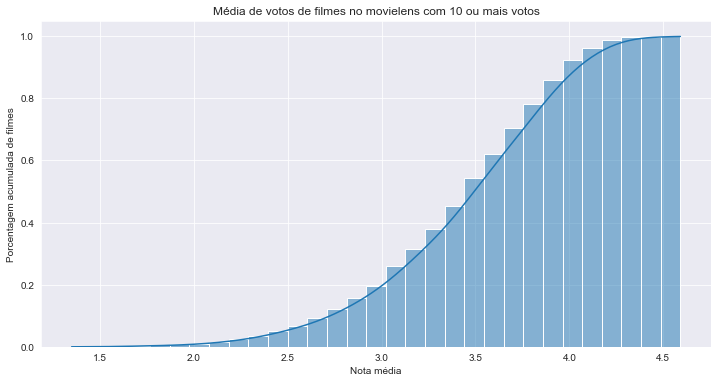

In [27]:
ax = sns.histplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, kde = True, cumulative = True, stat = 'density')
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Nota média', ylabel = 'Porcentagem acumulada de filmes',
       title = 'Média de votos de filmes no movielens com 10 ou mais votos');

##### Aqui podemos observar um gráfico acumulado com a porcentagem dasa notas, fica tipo uma distribuição dos dados em porcentagem só de forma gráfica.

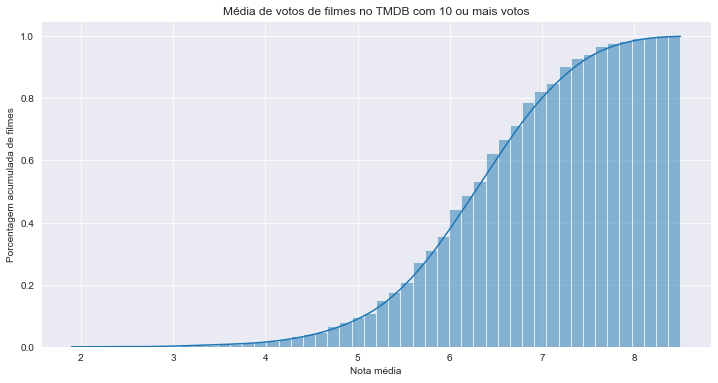

In [28]:
# realizando mesmo gráfico cumulativo para as avaliações do TMDB
ax = sns.histplot(tmdb_com_10.vote_average, kde = True, cumulative = True, stat = 'density')
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Nota média', ylabel = 'Porcentagem acumulada de filmes',
       title = 'Média de votos de filmes no TMDB com 10 ou mais votos');

# Analisando a distribuição dos dados de outras variáveis do conjunto de dados do TMDB

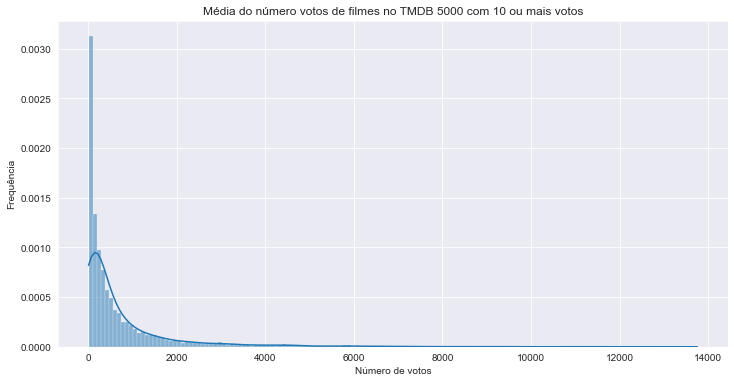

In [29]:
ax = sns.histplot(tmdb_com_10.vote_count, kde = True, stat = 'density')
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Número de votos', ylabel = 'Frequência', title = 'Média do número votos de filmes no TMDB 5000 com 10 ou mais votos');

In [30]:
# olhando para o orçamento dos filmes
tmdb.budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4798       220000
4799         9000
4800            0
4801            0
4802            0
Name: budget, Length: 4803, dtype: int64

##### percebemos que alguns filmes apresentam 0 de orçamento e isto deve ocorrer porque eles não deviam ter esses dados

In [31]:
tmdb.query('budget > 0').budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4791           13
4792        20000
4796         7000
4798       220000
4799         9000
Name: budget, Length: 3766, dtype: int64

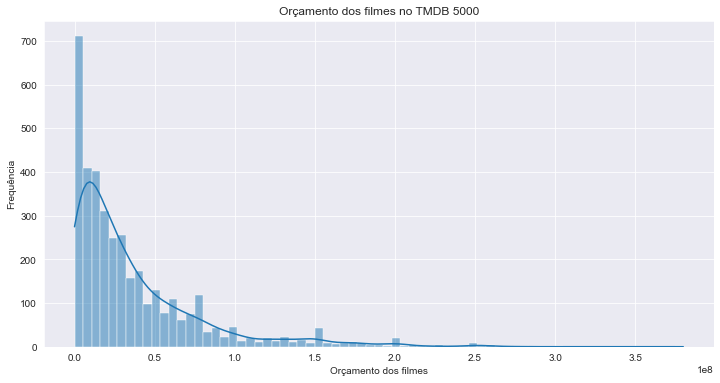

In [32]:
ax = sns.histplot(tmdb.query('budget > 0').budget.values, kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Orçamento dos filmes', ylabel = 'Frequência',
       title = 'Orçamento dos filmes no TMDB 5000');

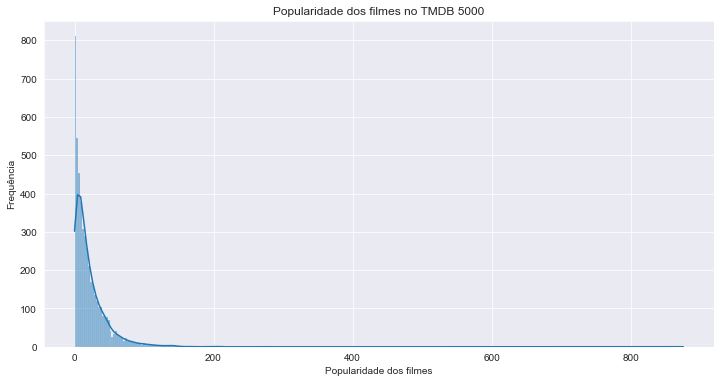

In [33]:
# analisando a variável popularity 
ax = sns.histplot(tmdb.popularity, kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Popularidade dos filmes', ylabel = 'Frequência',
       title = 'Popularidade dos filmes no TMDB 5000');

In [34]:
# analisando o tempo de duração dos filmes no tmdb
tmdb.query('runtime == 0').runtime

1011    0.0
3112    0.0
3669    0.0
3809    0.0
3953    0.0
3992    0.0
4068    0.0
4118    0.0
4205    0.0
4210    0.0
4241    0.0
4313    0.0
4318    0.0
4322    0.0
4328    0.0
4405    0.0
4435    0.0
4458    0.0
4502    0.0
4504    0.0
4553    0.0
4558    0.0
4564    0.0
4566    0.0
4569    0.0
4571    0.0
4581    0.0
4584    0.0
4611    0.0
4620    0.0
4633    0.0
4657    0.0
4658    0.0
4662    0.0
4729    0.0
Name: runtime, dtype: float64

Fica visível que temos diversos filmes no conjunto de dados que tem tempo de duração igual a zero e isso é impossível, contudo isto deve ocorrer pois eles não deveriam saber o tempo de duração do filme, com isso colocaram 0.

In [35]:
tmdb.query('runtime > 0').runtime

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4766, dtype: float64

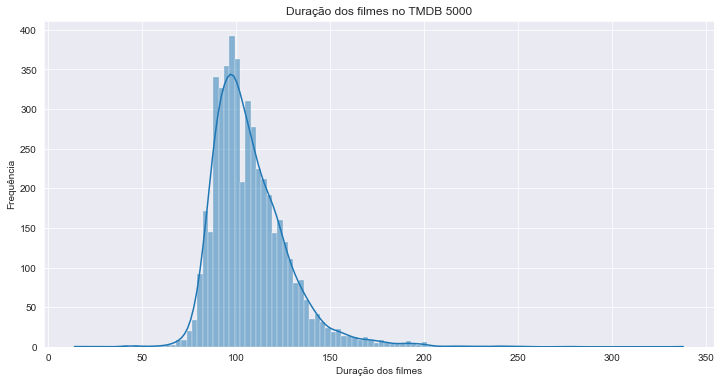

In [36]:
ax = sns.histplot(tmdb.query('runtime > 0').runtime, kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Duração dos filmes', ylabel = 'Frequência',
       title = 'Duração dos filmes no TMDB 5000');

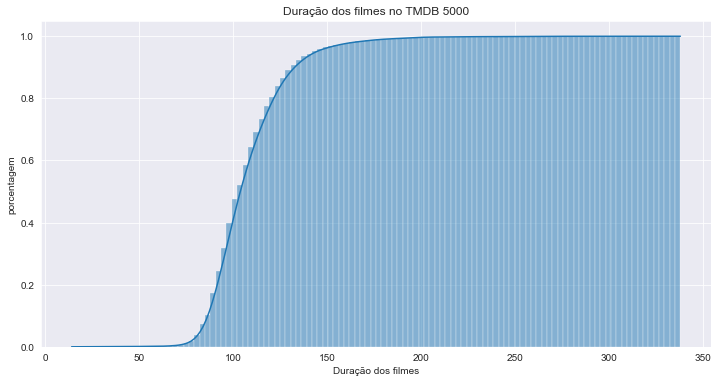

In [37]:
ax = sns.histplot(tmdb.query('runtime > 0').runtime, kde = True, cumulative = True, stat = 'density')
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Duração dos filmes', ylabel = 'porcentagem',
       title = 'Duração dos filmes no TMDB 5000');

In [38]:
# olhando a duração de 80% dos filmes
tmdb.query('runtime > 0').runtime.quantile(0.8)

121.0

# movielens: média dos filmes com pelo menos 10 votos

In [39]:
print('Média dos filmes do movielens com pelo menos 10 votos:',round(nota_media_dos_filmes_com_pelo_menos_10_votos.mean(), 3))

Média dos filmes do movielens com pelo menos 10 votos: 3.432


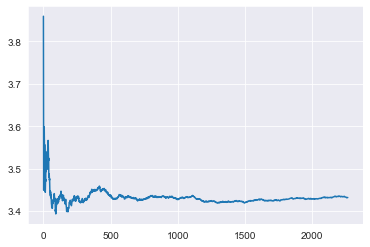

In [40]:
# vendo como a média se comporta a partir do tamnho das amostra aleatórias
np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac = 1)
medias = [temp[0:i].mean() for i in range(1, len(temp))]
plt.plot(medias)

In [41]:
nota_media_dos_filmes_com_pelo_menos_10_votos[0:len(nota_media_dos_filmes_com_pelo_menos_10_votos)]

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

In [44]:
# intervalo de confiança para média populacional
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos, alpha = 0.05)

(3.4112459477469557, 3.452854733323563)

In [46]:
# intervalo de confiança para média populacional utilizando o DescrStatsW
from statsmodels.stats.weightstats import DescrStatsW
descr_todos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos.zconfint_mean(alpha = 0.05)

(3.4112459477469557, 3.452854733323563)

# Analisando um filme em específico (comparar médias)

In [52]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [53]:
filmes = pd.read_csv('dados/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [54]:
filmes.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [57]:
notas1 = notas.query('movieId == 1')
notas1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


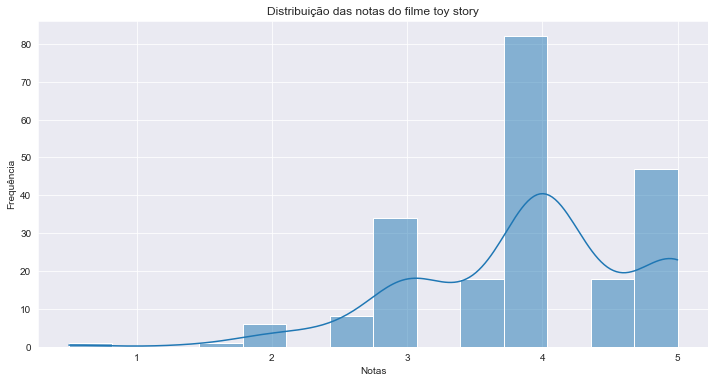

In [66]:
# olhando a distribuição de notas do toy story lembrado que as avaliações no movielens são até 5 e de 0.5 em 0.5
ax = sns.histplot(notas1.rating, kde = True)
ax.figure.set_size_inches(12,6)
ax.set(xlabel = 'Notas', ylabel = 'Frequência',
       title = 'Distribuição das notas do filme toy story');

C:\Users\Notebook Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


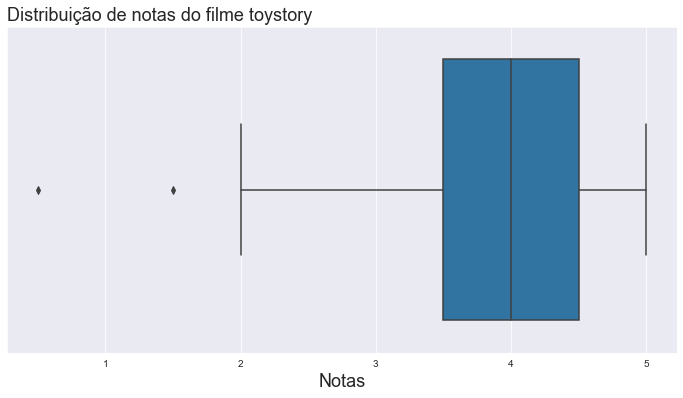

In [67]:
ax = sns.boxplot(notas1.rating)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de notas do filme toystory',
             fontsize = 18, loc = 'left')
ax.set_xlabel('Notas', fontsize = 18);

In [61]:
notas1.rating.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [69]:
# média das notas do conjunto de dados do filme toystory
notas1.rating.mean()

3.9209302325581397

## Agora realizando um ztest e aplicando um intervalo de confiança na média populacional para as notavas do toystory

In [70]:
notas1_descr = DescrStatsW(notas1.rating)

In [81]:
# aplicando um intevalo de confiança para média com nível de confiança de 95%
notas1_descr.zconfint_mean(alpha = 0.05)

(3.8093359183563402, 4.032524546759939)

In [82]:
# média do nosso conjunto de dados de todos os filmes com mais de 10 votos
nota_media_dos_filmes_com_pelo_menos_10_votos.mean()

3.4320503405352603

In [83]:
# agora realizando um ztest pra afirmar se a média populacional das notas do filme de toystory é igual aquela média do conjunto de dados total que temos
# H0 -> u = 3.4320503405352603
# H1 -> u # 3.4320503405352603
notas1_descr.ztest_mean(value = nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

(8.586342305916718, 8.978190401886878e-18)

In [87]:
estatistica_do_teste, p_valor = notas1_descr.ztest_mean(value = nota_media_dos_filmes_com_pelo_menos_10_votos.mean())
print(f'o p-valor calculado foi de: {p_valor}.')
print(f'logo como o p-valor é menor que o nível de significancia de 5%, p_valor<=0.05, nós rejeitamos a hipotese nula')

o p-valor calculado foi de: 8.978190401886878e-18.
logo como o p-valor é menor que o nível de significancia de 5%, p_valor<=0.05, nós rejeitamos a hipotese nula


## provando porque o z test tem que ser feito com uma quantidade de amostras razoável

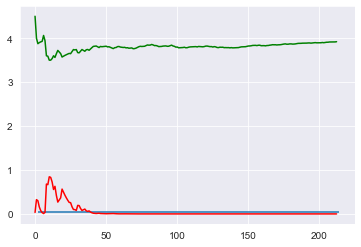

In [152]:
np.random.seed(75241)
temp = notas1.sample(frac = 1).rating
def calcula(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.4320503405352603)
    return (i, media, p)
    
media_toy = np.array([calcula(i) for i in range(2,len(temp))])
plt.plot(media_toy[:, 1], color = 'g')
plt.plot(media_toy[:, 2], color = 'r')
plt.hlines(y = 0.05, xmin = media_toy[0,0], xmax = media_toy[-1,0])

# Análise de dois conjunto de amostras 
* entre a distribuição das notas do filme toystory e todos os outros filmes

In [160]:
# pegando o intervalo de confiança para saber a diferença entre as mnédias das duas distribuições
zconfint(notas1.rating, notas.rating)

(0.2799245129192442, 0.5588219849631111)

com isso vemos que o filme do toystory apresenta uma média maior com intervalo de confiança acima apresentado, seja 0.27 maior ou 0.55 maior

In [168]:
# H0-> média_toystory - média_todos_os_filmes = 0
# H1-> média_toystory - média_todos_os_filmes # 0
stat, p = ztest(notas1.rating, notas.rating)
print(stat, p)

5.894327101501841 3.762112778881965e-09


como p-valor é menor que o nivél de significância que é 0.05 vemos que as médias são diferentes

In [167]:
# também podemos utilizar o comparemeans do statsmodels
descr_todas_as_notas = DescrStatsW(notas.rating)
comparacao = descr_todas_as_notas.get_compare(notas1_descr)
comparacao.ztest_ind()

(-5.894327101501853, 3.762112778881702e-09)

In [169]:
# intervalo de confiança
comparacao.zconfint_diff()

(-0.5588219849631109, -0.2799245129192445)

perceba que os valores são os mesmos, alguns ficarqam negativos pois o primeiro que eu utilizei no metodo compare foi justamente as notas de todos os filmes

Text(0.0, 1.0, 'Gráfico de boxplot das distribuição de notas do filme toy story e de todos os outros')

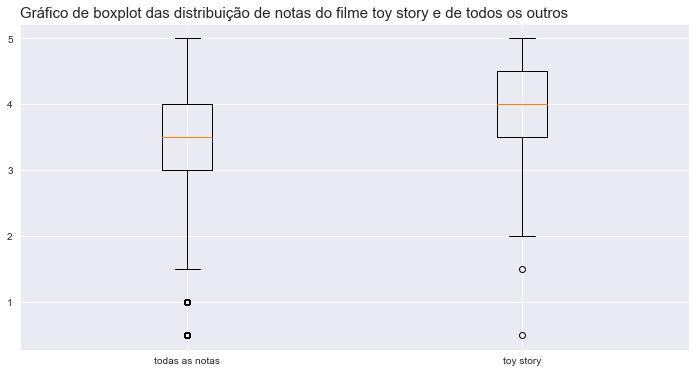

In [180]:
# olhando graficamente com um gráfico de boxplot
plt.figure(figsize=(12,6))
plt.boxplot(x = [notas.rating, notas1.rating], labels=['todas as notas', 'toy story']);
plt.title('Gráfico de boxplot das distribuição de notas do filme toy story e de todos os outros', loc = 'left',
         fontsize = 15)

# Comparar a média de fois filmes

In [182]:
filmes.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


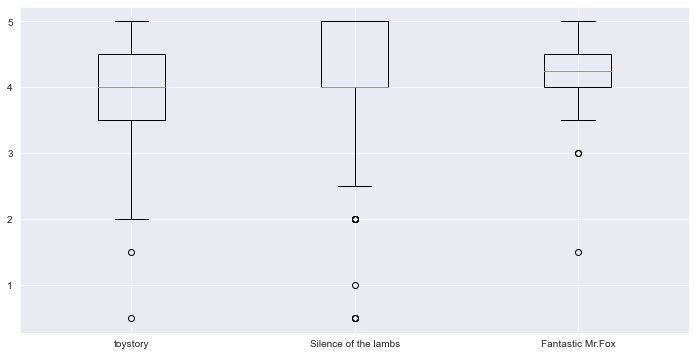

In [185]:
notas593 = notas.query('movieId == 593')
notas1 = notas.query('movieId == 1')
notas72226 = notas.query('movieId == 72226')
plt.figure(figsize=(12,6))
plt.boxplot(x = [notas1.rating, notas593.rating, notas72226.rating],
            labels = ['toystory', 'Silence of the lambs', 'Fantastic Mr.Fox']);

<AxesSubplot:xlabel='movieId', ylabel='rating'>

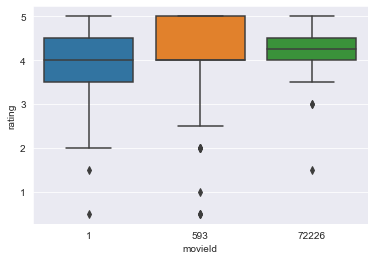

In [191]:
sns.boxplot(data = notas.query('movieId in [1, 593, 72226]'), x = 'movieId', y = 'rating')

In [194]:
# teste de hipótese entre as médias populacionais das notas dos filems do toystory e silence od lambs
# ho -> media_toy - media_silence = 0
# h1 -> media_toy - media_silence #(sinal de diferente) 0
stat, p_valor = ztest(notas1.rating, notas593.rating)
print(p_valor)

0.0017373604156636195


Logo, assumindo uma confianca de 95%, nós podemos descartar a hipótese nula, então a gente observa que as médias dos dois filmes são diferentres.

In [196]:
# realizando um intervalo de confiança da diferença da média entre os dois filmes
print(f'intervalço de confiança da diferença entre as médias: {zconfint(notas1.rating, notas593.rating)}')

intervalço de confiança da diferença entre as médias: (-0.3907836723504449, -0.08993650769456579)


Logo fica visível que a média do filme ToyStory apresenta ser menor que a média do filme Silence of lambs, com um nivél de confiança de 95%

# Obs : lembrando que que para executar o ztest e o ttest você precisa ver se as distribuições seguem uma normal e para ver isso podemos utilzar o normaltest do scipy 

In [203]:
from scipy.stats import normaltest
_, p = normaltest(notas1.rating)
p

0.00011053430732728716

logo vemos que a nossa dados da nossa amostra não vem de uma distribuição normal, com 99% de confiança, logo não podiamos aplicar nem o ztest e nem o Ttest

# Agora vamos comparar as médias dos filmes com um teste não-paramétrico, aqui irei utilizar o ranksums

In [209]:
from scipy.stats import ranksums
_, p = ranksums(notas593.rating, notas1.rating)
p

0.0003267718756440693

Com o p-valor sendo menor que 0.05, descartamos a hipótese nula e aceitamos a hipotese alternativa, onde fala que os valores de uma das amostras tendem a ser maiores que os da outra amostra. Logo olhando isso, junto com a média das amostra e um boxplot acima, vemos que o filme silencio dos inocentes tende a apresentar notas maiores que o do toystory.